# Vessel leakage quantification from FAF images

Laser induced choroidal neovascularization is a widely used animal model for recapitulating wet AMD disease. Lesions are caused in the animal using an ophthalmic laser. The main idea is to simulate the neovascularization process which takes place during the natural course of the disease. 

Fondus floresence angiography (FAF) is one the most used method for adressing the neovascularization. This type of images allow the measurement of a wide number of parameters. One of them is, when present, the leakage. This parameter is defined as an hyperfluorescent area of the image that usually correspond to a liquid extravasation from retinal blood vessels.

Usually, qualitative approaches are done using a scale grade (from 0 to 3). This scale is based on subjective observation from several graders. The limitations are the inability to quantify as well as the fact that important factors such as area are overlooked.

Quantivative method has been suggested in some recent publications. This is my first python approach to one of those method.

*Wigg JP, Zhang H, Yang D. A Quantitative and Standardized Method for the Evaluation of Choroidal Neovascularization Using MICRON III Fluorescein Angiograms in Rats. PLoS One. 2015 May 29;10(5):e0128418. doi: 10.1371/journal.pone.0128418. PMID: 26024231; PMCID: PMC4449229.*

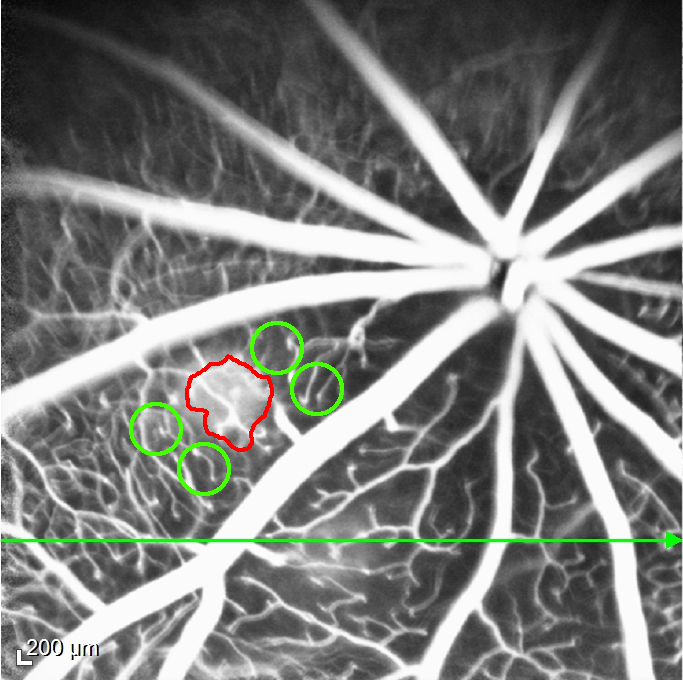

**Fig 1.** Representaive FAF image. Red area corresponds to vessel leakage perimeter. Green circles correspond to the four references or background area used in normalization process.

For calculating the fluorescence, the parameter used is mean gray value. This parameter can be measured with ImageJ software (NIH, USA). It is defined as sum of the gray values of all the pixels in the selection divided by the number of pixels. This value gives us a idea of how "bright" is the leakage area manually selected.

After measuring the leakage area, background of the image must be subtracted for normalization. This is achieved by averaging the mean gray values of 4 random spot measured within the same image.

$Net \; lesion \; fluorescence = Mean \; gray \; value \; of \; leakage \; area - \overline X  \; Random \; spots$

In order to obtain a measurement that further informs about the severity of the injury, normalized lesion index is calculated multipliying net lesion fluorescence index by the lesion area. This measure puts dimensionality and fluorescence together to give more us more context.

$Normalized \; lesion \; index = Net \; lesion \; fluorescence \; x \; Lesion \; area \;$

To begin, we import the libraries required for working with data frames and plots

In [11]:
import pandas as pd #dataframes
import matplotlib.pyplot as plt #plot

Subsequently, the data file is loaded and cleaned for missing values

In [12]:
data = pd.read_excel('H:/Mi unidad/Otros/Proyecto New Horizon/Bioinf/Python/Python freelancing/Leakage data.xlsx').dropna()

After, mean of the 4 random background area is calculated in a new column called "Rspot average"

In [13]:
data['Rspot average'] = data.iloc[0:, 6:10].mean(axis = 1)

Net lesion fluorescence value is calculated substrancting the average of random spot value from the MGV measured within the leakage area

In [14]:
data['Net lesion fluorescence'] = data.iloc[0:, 5] - data.iloc[0:, 10]

Then, the normalized lesion index (NLI) is calculated for every row

In [15]:
data['NLI'] = data.iloc[0:, 4] * data.iloc[0:, 11]

After calculating the NLI we extract the data for each time point of the expermient. This data will be used for calculating mean and standard deviation for the bar graph. Day 3, 5, 7 and 21. 

In [16]:
#Mean
day_3_mean = data[data['Day'] == 10][['NLI']].mean()
day_5_mean = data[data['Day'] == 12][['NLI']].mean()
day_7_mean = data[data['Day'] == 14][['NLI']].mean()
day_28_mean = data[data['Day'] == 28][['NLI']].mean()
#Standard deviation
day_3_sd = data[data['Day'] == 10][['NLI']].std()
day_5_sd = data[data['Day'] == 12][['NLI']].std()
day_7_sd = data[data['Day'] == 14][['NLI']].std()
day_28_sd = data[data['Day'] == 28][['NLI']].std()

After calculating the statistical data for the different days, we tidy all the data in one single data frame for plotting it easily

In [17]:
#creating two different series that can be merged in one dataframe
day_means = pd.concat([day_3_mean, day_5_mean, day_7_mean, day_28_mean]).reset_index(drop=True)
day_sd = pd.concat([day_3_sd, day_5_sd, day_7_sd, day_28_sd]).reset_index(drop=True)
#creating the dataframe
plot_data = pd.DataFrame([day_means, day_sd])
plot_data.columns = ['Day 3', 'Day 5', 'Day 7', 'Day 21']
plot_data.index = ['Mean', 'SD']
print(plot_data)

      Day 3      Day 5      Day 7    Day 21
Mean    0.0   4.941618  36.086250  52.75050
SD      0.0  14.246589  46.776049  54.83065


Finally, we plot the data frame in a bar graph using SD as an error bar

<Axes: ylabel='NLI'>

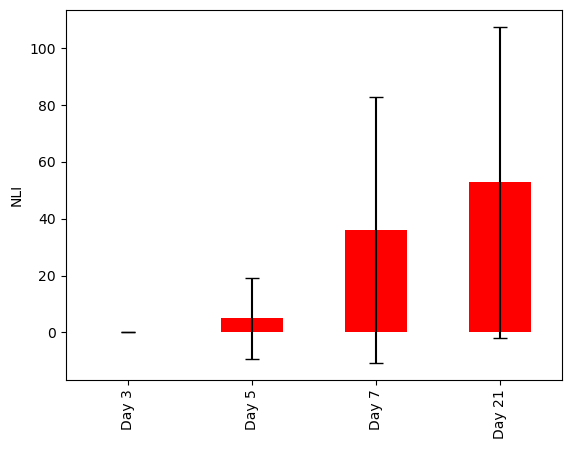

In [18]:
plot_data.T.plot(kind='bar', y=['Mean'], color=['red'], yerr='SD', capsize=5, legend=False, ylabel = 'NLI')